# Individual Assignment #4
Matteo Bordoni - 119474303

The goal of this project is to help you compare linear regression analysis with basic machine learning algorithms such as LASSO and Ridge.

 

As a start, choose one large city in your state as the focal city. Feel free to choose a city that interests you most, make sure the city has a large number of observations so that your data analysis is statistically meaningful. If your state is not populous, we suggest you choose the largest city.  All of your project 4 will focus on this city.

 

You will use four sets of information:

Safegraph dailyvisits data you've been using for the past assignments. 
A sample of demographic variables by census block group, as in the 2016 American Community Survey. The census block group id is defined as a 12-digit FIPS code, of which the first five digits define the corresponding state and county. This data is available on ELMS, under module week10.
A national dataset of COVID-19 cases collected by NY TimesLinks to an external site. (filename: us-counties.csv). It is also available on ELMS. This data includes the number of COVID-19 cases and the number of deaths by date, state and county from January 21, 2020 to present. It also provides a five-digit FIPS code as defined by the US Census for each state-county. From this file, you will extract the observations for the state-county that your city locates in.
Use online search engines to find COVID related policies for your city or state. Pay special attention to type and timing of policies (e.g. shutdown and different phases of reopening). You will need them when you construct policy variables in the data analysis.
 

When you turn in your jupyter notebook on ELMS (in both .ipynb and .pdf), please label clearly your name and the State-City you are focusing on. For example, if your name is Joe Smith and you focus on Maryland Baltimore City, you should name your project 4 submissions as Econ433-proj4-Joe-Smith-MD-Baltimore.ipynb and Econ433-proj4-Joe-Smith-MD-Baltimore.pdf.

 

Within your jupyter notebook, please use markdown cells to describe which python commands and outcome are for which question in the project. Make sure your notebook is reader-friendly, includes all key information, displays necessary outputs, and is free of unnecessary text (such as the error message before you fix the problem).

 

### Part 1: Prepare data

 

- Question 1a (1 point): From your long data (from Project 1 or Project 3), subset it for your choice of focal city. Display a table showing the number of observations for each year-month in this focal city.

 

- Question 1b (1 points): Download the data for Census demographics. Merge the long Safegraph dailyvisits data (you have created in Question 1a) with the demographic data, via the key `poi_cbg` in the long sample, and `census_block_group` in the demographic data (both variables represent the 12-digit FIPS code of census block group). Note that `poi_cbg' is originally from the Core Place data in Safegraph. If your long data in Question 1a does not include this variable, you will need to get it from the Core Place data and merge it into your long data. When you merge the long Safegraph dailvisits data with Census demographics data, only keep the matched observations. Drop the variable `census_block_group`. From now on, I will refer to this merged data as your “LocalSafegraph” data.

 

How many observations do you have in your “LocalSafegraph”? How many unique places are there? How many unique NAICS codes are there? What type of places do these NAICS codes represent? How many unique places do you have for each NACIS code? What is the average population for each observation in your “LocalSafeGraph” data?

 

In “LocalSafegraph”, `poi_cbg’ represents the 12-digit FIPS code for each Safegraph place. Define a separate string variable `FIPS_5digits’ as the first five digits of `poi_cbg’. How many unique values of `FIPS_5digits’ do you have in “LocalSafegraph”? Ideally, you should have only one value of `FIPS_5digits’, which represents the state-county your city locates in. If you have more than one value of `FIPS_5digits’, use the most frequent one as the state-county for your city. Write down the value of FIPS_5digits for your city, you will need that later on.

 

- Question 1c (1 point): Download the dataset of COVID-19 cases as collected by NY Times. Extract the relevant observations for your city using the value of FIPS_5digits you have found in Question 1b. I will refer to this data as your “LocalCOVIDcases”.

 

How many observations are there in your “LocalCOVIDcases”? What is the earliest date? What is the latest date? What is the average number of daily cases? What is the average number of daily deaths?

 

### Part 2: Merge data for final analysis sample

 

- Question 2a (1 points): Now merge your “LocalSafegraph” with “LocalCovidcases” by date. Keep all dates that appear in “LocalSafegraph”, even if they do not appear in “LocalCovidcases”. Do not include dates not showing up in “LocalSafegraph”. I will refer to the merged data as “LocalMerged”.

 

How many dates in your “LocalMerged” have missing values in the daily count of COVID cases and COVID deaths? Impute these missing values as COVID cases equal to 0 and COVID deaths equal to 0. (NY Times only reports COVID information after a COVID case started to occur in a local county.) After the imputation, what are the average daily COVID cases and daily COVID deaths in your “LocalMerged”?

 

- Question 2b (1 points): Use online search engines to find COVID related policies for your city or state. Pay special attention to type and timing of policies (e.g. shutdown and different phases of reopening). Create one or multiple variables to describe these policies. For example, if your city/state was shutdown at 2020-03-15, partially reopened on 2020-4-15, and full reopened on 2020-6-25, you can define Shutdown equal to one if the date is between 2020-03-15 and 2020-04-14, zero otherwise; Reopen1 equal to one if the date is between 2020-04-15 and 2020-06-24, zero otherwise; and Reopen2 equal to one if the date is on or after 2020-06-25. You may also want to create covid policies related to the Delta and Omicron variants, and vaccine mandates.

 

How many policy variables do you create? What is their specific definition? Justify why you choose them this way.

 

- Question 2c (2 points): Now define your dependent variable as Log(DailyVisits+1). Define the list of your potential right-hand variables, which should include some industry indicators (generated from NAICS codes), day of week indicators (Monday, Tuesday …, Sunday), some demographics, some variables for COVID cases and deaths, and at least one variable describing COVID-related policies. Feel free to add new variables to this list, as long as you articulate a reason for their relevance.

 

Summarize all these variables in a table with the number of observations, mean, median, standard deviation, minimum and maximum. If some variables are categorical and thus cannot appear in this summary table, create separate table(s) to describe the frequency of each value in such categorical variable(s).

 

### Part 3: Linear regression, LASSO and Ridge

 

- Question 3a (2 points): Choose a list of variables to predict log(dailyvisits+1). The list you choose could be a subset of the potential right-hand variables you have identified in Question 2c. I will refer to these variables as “features”.

 

Use the Python command “train_test_split()” to separate your “LocalMerged” into a training sample and a test sample.

 

Use function MinMaxScalar() to standardize all the “features” you choose, in both the training and test samples.

 

How many observations are there in the training sample? How many in the test sample? Choose at least two variables to comment on the difference between the two samples. For example, are they different in the months covered? Are they different in certain demographics? Feel free to use other variables for this comparison.

 

- Question 3b (2 points): Using Log(dailyvisits+1) and the standardized features in Question 3a, run a linear regression in your training sample. Report the coefficient estimates and R-squares.

 

What “features” have statistically significant coefficients (with p-value<0.05)? Among these significant “features”, which has a positive coefficient and which has a negative coefficient? Comment on whether their signs and magnitude confirm your prior.

 

If you extend the model to predict log(dailyvisits+1) in the test sample, what is the R-squares in the test sample?

 

- Question 3c (2 points): Using Log(dailyvisits+1) and the standardized features in Question 3a, run LASSO in your training sample.

 

Try at least three different values for the penalty parameter. For each value you have tried, report the coefficient estimates and R-squares; also extend the model to predict log(dailyvisits+1) in the test sample, and report the R-squares in the test sample.

 

Among the penalty parameters you have tried, which one is most appropriate? Explain how you arrive at this choice.

 

In the LASSO model with your preferred choice of the penalty parameter, what “features” have zero (or very close to zero) coefficients? What and how many “features” have non-zero coefficients? Comment on whether their signs and magnitude confirm your prior. What is the R-squares when you apply this model to the test sample? Is it higher or lower than what you find in question 3b for linear regression?

 

Use the random permutation method to identify the five most important features in the above LASSO model. What are they? Comment on whether the order of their importance is consistent with your prior.

 

- Question 3d (2 points): Using Log(dailyvisits+1) and the standardized features in Question 3a, run Ridge in your training sample.

 

Try at least three different values for the penalty parameter. For each value you have tried, report the coefficient estimates and R-squares; also extend the model to predict log(dailyvisits+1) in the test sample, and report the R-squares in the test sample.

 

Among the penalty parameters you have tried, which one is most appropriate? Explain how you arrive at this choice.

 

In the Ridge model with your preferred choice of the penalty parameter, what “features” have zero (or very close to zero) coefficients? What and how many “features” have non-zero coefficients? Comment on whether their signs and magnitude confirm your prior. What is the R-squares when you apply this model to the test sample? Is it higher or lower than what you find in question 3b for linear regression and question 3c for LASSO?

 

Use the random permutation method to identify the five most important features in the above Ridge model. What are they? Comment on whether the order of their importance is consistent with your prior. Does Ridge identify the same five most important features as LASSO?

## Setting Up the Work Space

Before starting to work, it is necessary to set up the working space, importing all the libraries necessary to complete the task 

In [1]:
import pandas as pd 
import numpy as np
import datetime

import warnings
warnings.filterwarnings("ignore")

## Importing the Data 

The work is started by importing and loading the data into the working space. The work will consider two different dataframes: a long sample, which has been created in the past assignments, and a new dataframe with census data. 

### Question 1a

In [2]:
name = 'long_sample.csv'
long_sample = pd.read_csv(name)
long_sample.head()

,placekey,city,region,date,daily_visits,day_of_week,positive_visits,weekend
0,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-05,1,Monday,1,0
1,zzw-223@63m-v37-tqf,Ashland,KY,2018-02-05,10,Monday,1,0
2,222-222@5pn-ffm-y5f,Madisonville,KY,2018-02-05,3,Monday,1,0
3,222-222@8g9-rgb-26k,Burnside,KY,2018-02-05,0,Monday,0,0
4,222-223@5px-8zj-7yv,Fairdale,KY,2018-02-05,6,Monday,1,0


In [3]:
lou_data = long_sample[long_sample['city'] == 'Louisville']
lou_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883428 entries, 0 to 4771442
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   placekey         883428 non-null  object
 1   city             883428 non-null  object
 2   region           883428 non-null  object
 3   date             883428 non-null  object
 4   daily_visits     883428 non-null  int64 
 5   day_of_week      883428 non-null  object
 6   positive_visits  883428 non-null  int64 
 7   weekend          883428 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 60.7+ MB


In [4]:
lou_data['date'] = pd.to_datetime(lou_data['date'])
lou_data['year_month'] = lou_data['date'].dt.strftime('%Y-%m')
obs_number = lou_data['year_month'].value_counts().reset_index()
obs_number.columns = ['year_month', 'count']
obs_number = obs_number.sort_values('year_month')
obs_number

,year_month,count
18,2018-01,15322
50,2018-02,13870
14,2018-03,15508
20,2018-04,15121
9,2018-05,15583
...,...,...
2,2022-09,15663
1,2022-10,15683
26,2022-11,15039
17,2022-12,15429


### Question 1b

At this point, the second dataset is imported 

In [5]:
name_1 = 'cbg.csv'
cbg = pd.read_csv(name_1)
cbg.head()

,census_block_group,B01001e1,B01001e2,B01002e1,B01002e2,B01002e3,B02001e2,B02001e3,B02001e5,B11001e1,...,B15003e21,B15003e22,B15003e23,B15003e24,B15003e25,EDU_under,EDU_higher,B19013e1,B19025e1,B19301e1
0,10010201001,745,356,34.1,37.1,33.7,585,160,0,284,...,15,60,23,7,16,0.217300,0.468354,NaN,14126600.0,20365.0
1,10010201002,1265,639,41.8,39.9,44.8,1083,104,9,456,...,34,156,118,18,9,0.077670,0.598301,77813.0,41514300.0,33336.0
2,10010202001,960,534,38.2,23.6,45.0,361,568,0,386,...,15,54,7,9,0,0.200997,0.363787,25179.0,15608200.0,17047.0
3,10010202002,1236,634,39.7,33.5,43.3,615,571,24,452,...,74,113,39,9,6,0.177700,0.457607,45104.0,25847500.0,21400.0
4,10010203001,2364,1125,34.9,34.1,39.3,1481,515,27,824,...,112,205,133,10,18,0.126214,0.524272,55222.0,50827900.0,23106.0


To merge with the previous dataset, we need to retrieve the column 'poi_cbg'

In [6]:
name_2 = 'core_places_2018-2022_sample.csv'
state_core_places = pd.read_csv(name_2)
state_core_places.head()

,placekey,parent_placekey,safegraph_brand_ids,naics_code,postal_code,region,city,distance_from_home,median_dwell,poi_cbg
0,222-222@3bc-tnz-ffz,NaN,NaN,721110,99631.0,AK,Moose Pass,NaN,28.392857,21220003001
1,222-222@3bc-yjz-vpv,NaN,NaN,722511,99587.0,AK,Girdwood,NaN,88.000000,20200029002
2,222-222@3bg-qd7-qpv,NaN,NaN,611110,99639.0,AK,Ninilchik,NaN,19.714286,21220008001
3,222-222@3bh-25s-zmk,NaN,NaN,611110,99603.0,AK,Fritz Creek,3414.000000,8.901235,21220011002
4,222-222@3bh-2b5-j5f,NaN,NaN,721110,99603.0,AK,Homer,47769.761905,88.095238,21220010001


In [7]:
merged_data = pd.merge(long_sample, state_core_places[['placekey', 'poi_cbg','naics_code']], on='placekey')
merged_data_lou = merged_data[merged_data['city'] == 'Louisville']
merged_data_lou.head()

,placekey,city,region,date,daily_visits,day_of_week,positive_visits,weekend,poi_cbg,naics_code
0,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-05,1,Monday,1,0,211110049001,722511
1,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-12,0,Monday,0,0,211110049001,722511
2,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-19,1,Monday,1,0,211110049001,722511
3,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-26,0,Monday,0,0,211110049001,722511
4,zzw-224@5px-7c2-z75,Louisville,KY,2018-07-09,0,Monday,0,0,211110049001,722511


In [8]:
local_safe_graph = pd.merge(merged_data_lou, cbg, left_on='poi_cbg', right_on='census_block_group')
local_safe_graph = local_safe_graph.drop('census_block_group',axis = 1)
local_safe_graph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881349 entries, 0 to 881348
Data columns (total 41 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   placekey         881349 non-null  object 
 1   city             881349 non-null  object 
 2   region           881349 non-null  object 
 3   date             881349 non-null  object 
 4   daily_visits     881349 non-null  int64  
 5   day_of_week      881349 non-null  object 
 6   positive_visits  881349 non-null  int64  
 7   weekend          881349 non-null  int64  
 8   poi_cbg          881349 non-null  int64  
 9   naics_code       881349 non-null  int64  
 10  B01001e1         881349 non-null  int64  
 11  B01001e2         881349 non-null  int64  
 12  B01002e1         881349 non-null  float64
 13  B01002e2         881349 non-null  float64
 14  B01002e3         881349 non-null  float64
 15  B02001e2         881349 non-null  int64  
 16  B02001e3         881349 non-null  int6

In [9]:
local_safe_graph.head()

,placekey,city,region,date,daily_visits,day_of_week,positive_visits,weekend,poi_cbg,naics_code,...,B15003e21,B15003e22,B15003e23,B15003e24,B15003e25,EDU_under,EDU_higher,B19013e1,B19025e1,B19301e1
0,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-05,1,Monday,1,0,211110049001,722511,...,94,149,132,9,33,0.273184,0.505028,18546.0,63186400.0,36296.0
1,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-12,0,Monday,0,0,211110049001,722511,...,94,149,132,9,33,0.273184,0.505028,18546.0,63186400.0,36296.0
2,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-19,1,Monday,1,0,211110049001,722511,...,94,149,132,9,33,0.273184,0.505028,18546.0,63186400.0,36296.0
3,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-26,0,Monday,0,0,211110049001,722511,...,94,149,132,9,33,0.273184,0.505028,18546.0,63186400.0,36296.0
4,zzw-224@5px-7c2-z75,Louisville,KY,2018-07-09,0,Monday,0,0,211110049001,722511,...,94,149,132,9,33,0.273184,0.505028,18546.0,63186400.0,36296.0


In [10]:
local_safe_graph.describe()

,daily_visits,positive_visits,weekend,poi_cbg,naics_code,B01001e1,B01001e2,B01002e1,B01002e2,B01002e3,...,B15003e21,B15003e22,B15003e23,B15003e24,B15003e25,EDU_under,EDU_higher,B19013e1,B19025e1,B19301e1
count,881349.000000,881349.000000,881349.000000,8.813490e+05,881349.000000,881349.000000,881349.000000,881349.000000,881349.000000,881349.000000,...,881349.000000,881349.000000,881349.000000,881349.000000,881349.000000,874181.000000,874181.000000,851011.000000,8.741810e+05,881349.000000
mean,11.628170,0.880695,0.285714,2.111023e+11,665820.500719,1520.574638,758.466972,38.370408,36.466713,40.575105,...,75.908480,199.909147,109.982225,25.210028,16.552956,0.120782,0.612256,50554.063789,4.432300e+07,28902.257944
std,21.600811,0.324147,0.451754,7.972732e+07,88508.907638,697.504857,371.610807,7.615186,8.131212,8.892294,...,53.031302,169.760062,104.653377,33.305463,22.316153,0.106158,0.183730,25281.550444,3.129199e+07,11841.316049
min,0.000000,0.000000,0.000000,2.102902e+11,445110.000000,160.000000,74.000000,17.900000,4.600000,11.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.171367,8750.000000,2.483500e+06,3763.000000
25%,2.000000,1.000000,0.000000,2.111101e+11,624410.000000,981.000000,488.000000,33.500000,31.900000,34.100000,...,35.000000,73.000000,33.000000,0.000000,0.000000,0.033755,0.470684,30787.000000,2.178820e+07,20870.000000
50%,5.000000,1.000000,0.000000,2.111101e+11,722511.000000,1378.000000,696.000000,38.300000,36.800000,41.200000,...,66.000000,149.000000,77.000000,11.000000,7.000000,0.089243,0.616000,48011.000000,3.553010e+07,27739.000000
75%,13.000000,1.000000,1.000000,2.111101e+11,722511.000000,1967.000000,971.000000,43.600000,41.300000,46.700000,...,96.000000,281.000000,153.000000,37.000000,31.000000,0.183957,0.779958,61458.000000,6.294370e+07,36296.000000
max,1413.000000,1.000000,1.000000,2.111101e+11,722513.000000,5263.000000,2627.000000,64.100000,63.200000,70.600000,...,375.000000,1048.000000,577.000000,177.000000,113.000000,0.528369,0.979215,135469.000000,2.148170e+08,91134.000000


In [11]:
local_safe_graph['fips'] = local_safe_graph['poi_cbg'].astype(str).str[:5]
local_safe_graph.head()

,placekey,city,region,date,daily_visits,day_of_week,positive_visits,weekend,poi_cbg,naics_code,...,B15003e22,B15003e23,B15003e24,B15003e25,EDU_under,EDU_higher,B19013e1,B19025e1,B19301e1,fips
0,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-05,1,Monday,1,0,211110049001,722511,...,149,132,9,33,0.273184,0.505028,18546.0,63186400.0,36296.0,21111
1,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-12,0,Monday,0,0,211110049001,722511,...,149,132,9,33,0.273184,0.505028,18546.0,63186400.0,36296.0,21111
2,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-19,1,Monday,1,0,211110049001,722511,...,149,132,9,33,0.273184,0.505028,18546.0,63186400.0,36296.0,21111
3,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-26,0,Monday,0,0,211110049001,722511,...,149,132,9,33,0.273184,0.505028,18546.0,63186400.0,36296.0,21111
4,zzw-224@5px-7c2-z75,Louisville,KY,2018-07-09,0,Monday,0,0,211110049001,722511,...,149,132,9,33,0.273184,0.505028,18546.0,63186400.0,36296.0,21111


In [12]:
local_safe_graph['naics_code'].value_counts()

722511    287644
722513    215838
624410    130074
611110     83769
445110     78477
721110     55237
445120     15974
611310     14336
Name: naics_code, dtype: int64

In [13]:
naics_dict = {'722511': 'Full-Service Restaurants',
              '722513': 'Limited-Service Restaurants',
              '624410': 'Child Day Care Services',
              '611110': 'Elementary and Secondary Schools',
              '445110': 'Supermarkets and Other Grocery Stores',
              '721110': 'Hotels (except Casino Hotels) and Motels',
              '445120': 'Convenience Stores',
              '611310': 'Colleges, Universities, and Professional Schools'}
naics_df = pd.DataFrame.from_dict(naics_dict, orient='index', columns=['Description'])
naics_df.index.name = 'NAICS Code'
naics_df

,Description
NAICS Code,
722511,Full-Service Restaurants
722513,Limited-Service Restaurants
624410,Child Day Care Services
611110,Elementary and Secondary Schools
445110,Supermarkets and Other Grocery (except Conveni...
721110,Hotels (except Casino Hotels) and Motels
445120,Convenience Stores
611310,"Colleges, Universities, and Professional Schools"


In [14]:
local_safe_graph['fips'].value_counts()

21111    872907
21029      8407
21073        35
Name: fips, dtype: int64

In [15]:
local_safe_graph_lou = local_safe_graph[local_safe_graph['fips'] == '21111']
local_safe_graph_lou.head()

,placekey,city,region,date,daily_visits,day_of_week,positive_visits,weekend,poi_cbg,naics_code,...,B15003e22,B15003e23,B15003e24,B15003e25,EDU_under,EDU_higher,B19013e1,B19025e1,B19301e1,fips
0,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-05,1,Monday,1,0,211110049001,722511,...,149,132,9,33,0.273184,0.505028,18546.0,63186400.0,36296.0,21111
1,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-12,0,Monday,0,0,211110049001,722511,...,149,132,9,33,0.273184,0.505028,18546.0,63186400.0,36296.0,21111
2,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-19,1,Monday,1,0,211110049001,722511,...,149,132,9,33,0.273184,0.505028,18546.0,63186400.0,36296.0,21111
3,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-26,0,Monday,0,0,211110049001,722511,...,149,132,9,33,0.273184,0.505028,18546.0,63186400.0,36296.0,21111
4,zzw-224@5px-7c2-z75,Louisville,KY,2018-07-09,0,Monday,0,0,211110049001,722511,...,149,132,9,33,0.273184,0.505028,18546.0,63186400.0,36296.0,21111


### Question 1c

Now, it is added the dataset with relevant covid information

In [16]:
name_4 = 'us-counties-covid.csv'
covid_data = pd.read_csv(name_4)
covid_data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [17]:
local_covid_cases = covid_data[covid_data['fips'] == 21111.0]
local_covid_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 800 to 2500633
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    797 non-null    object 
 1   county  797 non-null    object 
 2   state   797 non-null    object 
 3   fips    797 non-null    float64
 4   cases   797 non-null    int64  
 5   deaths  797 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 43.6+ KB


In [18]:
print('first observation:' , local_covid_cases['date'].min())
print('last observation:'  ,local_covid_cases['date'].max())
print('average case number:' , local_covid_cases['cases'].mean() )
print('average death number:' , local_covid_cases['deaths'].mean() )

first observation: 2020-03-08
last observation: 2022-05-13
average case number: 82990.00752823087
average death number: 1044.7227101631117


### Question 2a

In [19]:
local_merged = pd.merge(local_safe_graph_lou, local_covid_cases, on='date', how='left')
local_merged = local_merged.drop('fips_y',axis = 1)
local_merged.rename(columns = {'fips_x' : 'fips'}, inplace = True)
local_merged.head()

,placekey,city,region,date,daily_visits,day_of_week,positive_visits,weekend,poi_cbg,naics_code,...,EDU_under,EDU_higher,B19013e1,B19025e1,B19301e1,fips,county,state,cases,deaths
0,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-05,1,Monday,1,0,211110049001,722511,...,0.273184,0.505028,18546.0,63186400.0,36296.0,21111,NaN,NaN,NaN,NaN
1,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-12,0,Monday,0,0,211110049001,722511,...,0.273184,0.505028,18546.0,63186400.0,36296.0,21111,NaN,NaN,NaN,NaN
2,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-19,1,Monday,1,0,211110049001,722511,...,0.273184,0.505028,18546.0,63186400.0,36296.0,21111,NaN,NaN,NaN,NaN
3,zzw-224@5px-7c2-z75,Louisville,KY,2018-02-26,0,Monday,0,0,211110049001,722511,...,0.273184,0.505028,18546.0,63186400.0,36296.0,21111,NaN,NaN,NaN,NaN
4,zzw-224@5px-7c2-z75,Louisville,KY,2018-07-09,0,Monday,0,0,211110049001,722511,...,0.273184,0.505028,18546.0,63186400.0,36296.0,21111,NaN,NaN,NaN,NaN


In [20]:
missing_cases = local_merged['cases'].isnull().sum()
missing_deaths = local_merged['deaths'].isnull().sum()
local_merged['cases'].fillna(0, inplace=True)
local_merged['deaths'].fillna(0, inplace=True)
avg_cases = local_merged['cases'].mean()
avg_deaths = local_merged['deaths'].mean()
print(f"Number of missing COVID cases: {missing_cases}")
print(f"Number of missing COVID deaths: {missing_deaths}")
print(f"Average daily COVID cases: {avg_cases}")
print(f"Average daily COVID deaths: {avg_deaths}")

Number of missing COVID cases: 507917
Number of missing COVID deaths: 507917
Average daily COVID cases: 34798.5453249888
Average daily COVID deaths: 438.23580862566115


In [21]:
local_merged.isna().sum()

placekey                0
city                    0
region                  0
date                    0
daily_visits            0
day_of_week             0
positive_visits         0
weekend                 0
poi_cbg                 0
naics_code              0
B01001e1                0
B01001e2                0
B01002e1                0
B01002e2                0
B01002e3                0
B02001e2                0
B02001e3                0
B02001e5                0
B11001e1                0
B11001e2                0
B11001e3                0
B11001e4                0
B11001e5                0
B11001e6                0
B11001e7                0
B11001e8                0
B11001e9                0
B15003e17               0
B15003e18               0
B15003e19               0
B15003e20               0
B15003e21               0
B15003e22               0
B15003e23               0
B15003e24               0
B15003e25               0
EDU_under            7168
EDU_higher           7168
B19013e1    

In [22]:
local_merged.drop(
    columns = ['B19013e1', 'county',
               'state' ], 
    inplace = True)
local_merged = local_merged.dropna()
print(len(local_merged))

865739


In [23]:
local_merged.columns

Index(['placekey', 'city', 'region', 'date', 'daily_visits', 'day_of_week',
       'positive_visits', 'weekend', 'poi_cbg', 'naics_code', 'B01001e1',
       'B01001e2', 'B01002e1', 'B01002e2', 'B01002e3', 'B02001e2', 'B02001e3',
       'B02001e5', 'B11001e1', 'B11001e2', 'B11001e3', 'B11001e4', 'B11001e5',
       'B11001e6', 'B11001e7', 'B11001e8', 'B11001e9', 'B15003e17',
       'B15003e18', 'B15003e19', 'B15003e20', 'B15003e21', 'B15003e22',
       'B15003e23', 'B15003e24', 'B15003e25', 'EDU_under', 'EDU_higher',
       'B19025e1', 'B19301e1', 'fips', 'cases', 'deaths'],
      dtype='object')

In [24]:
local_merged['date'] = pd.to_datetime(local_merged['date'])
local_merged['dayofweek'] = local_merged['date'].dt.dayofweek

In [25]:
local_merged['weekend'] = np.where(local_merged['dayofweek'] >= 5, 1, 0)

### Question 2b 

To create variables to describe the COVID-related policies in Louisville, Kentucky, I used information from the Kentucky government website (https://governor.ky.gov/covid19), the Louisville Metro Government website (https://louisvilleky.gov/government/advanced-planning-and-sustainability/covid-19-response), and local news sources. Based on this information, I created the following variables:

In [26]:
shutdown = [(datetime.date(2020,3,16), datetime.date(2020,4,30))]
reopen_1 = [(datetime.date(2020,5,1), datetime.date(2020,5,20))]
reopen_2 = [(datetime.date(2020,7,9), datetime.date(2020,7,29))]
reopen_3 = [(datetime.date(2020,11,30), datetime.date(2021,2,1))]
reopen_4 = [(datetime.date(2021,3,28), datetime.date(2021,5,11))]
reopen_5 = [(datetime.date(2021,5,12), datetime.date(2021,5,27))]
delta_variant = [(datetime.date(2021,6,25), datetime.date(2022,2,20))]
omicron_variant = [(datetime.date(2022,12,1), datetime.date(2023,4,21))]

From an economic standpoint, the reopening phases that allowed more businesses to operate at higher capacity or that permitted larger gatherings were likely more significant. This would include phases such as Reopen_2 (allowing bars and entertainment venues to open at 33% capacity), Reopen_3 (allowing indoor dining at 50% capacity), Reopen_4 (allowing gyms to open at 50% capacity), and Reopen_5 (allowing outdoor events with up to 1,000 people). These phases allowed more businesses to operate and generate revenue, which could have had a positive impact on the local economy. However, the impact of each phase on the economy would depend on the specific businesses and industries in Louisville, and how they were affected by the pandemic and related policies.

In [27]:
shutdown = [(datetime.date(2020,3,16), datetime.date(2020,4,30))]
local_merged['in_shutdown'] = local_merged['date'].apply(lambda x: 1 if any(start <= x <= end for start, end in shutdown) else 0)

reopen_1 = [(datetime.date(2020,5,1), datetime.date(2020,5,20))]
local_merged['in_reopen_1'] = local_merged['date'].apply(lambda x: 1 if any(start <= x <= end for start, end in reopen_1) else 0)

reopen_2 = [(datetime.date(2020,7,9), datetime.date(2020,7,29))]
local_merged['in_reopen_2'] = local_merged['date'].apply(lambda x: 1 if any(start <= x <= end for start, end in reopen_2) else 0)

reopen_3 = [(datetime.date(2020,11,30), datetime.date(2021,2,1))]
local_merged['in_reopen_3'] = local_merged['date'].apply(lambda x: 1 if any(start <= x <= end for start, end in reopen_3) else 0)

reopen_4 = [(datetime.date(2021,3,28), datetime.date(2021,5,11))]
local_merged['in_reopen_4'] = local_merged['date'].apply(lambda x: 1 if any(start <= x <= end for start, end in reopen_4) else 0)

reopen_5 = [(datetime.date(2021,5,12), datetime.date(2021,5,27))]
local_merged['in_reopen_5'] = local_merged['date'].apply(lambda x: 1 if any(start <= x <= end for start, end in reopen_5) else 0)

delta_variant = [(datetime.date(2021,6,25), datetime.date(2022,2,20))]
local_merged['in_delta_variant'] = local_merged['date'].apply(lambda x: 1 if any(start <= x <= end for start, end in delta_variant) else 0)

omicron_variant = [(datetime.date(2022,12,1), datetime.date(2023,4,21))]
local_merged['in_omicron_variant'] = local_merged['date'].apply(lambda x: 1 if any(start <= x <= end for start, end in omicron_variant) else 0)

### Question 2c

In [28]:
X = local_merged.loc[:,['weekend', 'dayofweek', 'naics_code', 
                             'B01001e1', 'B01001e2', 'B01002e1', 
                             'B01002e2', 'B01002e3', 'B02001e2',
                             'B02001e3', 'B02001e5', 'B11001e1', 
                             'B11001e2', 'B11001e3', 
                             'B19025e1', 'B19301e1',
                             'EDU_under', 'cases', 
                             'in_shutdown', 'in_delta_variant'
              ]]
y = np.log(local_merged.loc[:, 'daily_visits'] + 1)

In [29]:
X.isna().any()

weekend             False
dayofweek           False
naics_code          False
B01001e1            False
B01001e2            False
B01002e1            False
B01002e2            False
B01002e3            False
B02001e2            False
B02001e3            False
B02001e5            False
B11001e1            False
B11001e2            False
B11001e3            False
B19025e1            False
B19301e1            False
EDU_under           False
cases               False
in_shutdown         False
in_delta_variant    False
dtype: bool

In [30]:
X = pd.get_dummies(data = X, drop_first = True)
X.head()

,weekend,dayofweek,naics_code,B01001e1,B01001e2,B01002e1,B01002e2,B01002e3,B02001e2,B02001e3,B02001e5,B11001e1,B11001e2,B11001e3,B19025e1,B19301e1,EDU_under,cases,in_shutdown,in_delta_variant
0,0,0,722511,2234,1506,35.9,32.6,44.2,1142,1004,12,577,126,105,63186400.0,36296.0,0.273184,0.0,0,0
1,0,0,722511,2234,1506,35.9,32.6,44.2,1142,1004,12,577,126,105,63186400.0,36296.0,0.273184,0.0,0,0
2,0,0,722511,2234,1506,35.9,32.6,44.2,1142,1004,12,577,126,105,63186400.0,36296.0,0.273184,0.0,0,0
3,0,0,722511,2234,1506,35.9,32.6,44.2,1142,1004,12,577,126,105,63186400.0,36296.0,0.273184,0.0,0,0
4,0,0,722511,2234,1506,35.9,32.6,44.2,1142,1004,12,577,126,105,63186400.0,36296.0,0.273184,0.0,0,0


In [31]:
X.describe()

,weekend,dayofweek,naics_code,B01001e1,B01001e2,B01002e1,B01002e2,B01002e3,B02001e2,B02001e3,B02001e5,B11001e1,B11001e2,B11001e3,B19025e1,B19301e1,EDU_under,cases,in_shutdown,in_delta_variant
count,865739.000000,865739.000000,865739.000000,865739.000000,865739.000000,865739.000000,865739.000000,865739.000000,865739.000000,865739.000000,865739.000000,865739.000000,865739.000000,865739.000000,8.657390e+05,865739.000000,865739.000000,865739.000000,865739.000000,865739.000000
mean,0.285714,3.000000,666228.202762,1515.341583,756.568012,38.491946,36.552703,40.737764,1127.319299,288.316081,41.834642,624.985123,345.106665,238.205163,4.414311e+07,29155.707504,0.120341,34788.638823,0.024010,0.128493
std,0.451754,2.000001,88475.241138,679.921126,364.501483,7.434061,7.994147,8.722700,650.947923,312.399519,80.334606,251.430228,202.487550,179.950111,3.130652e+07,11714.296224,0.106562,61658.347424,0.153079,0.334638
min,0.000000,0.000000,445110.000000,160.000000,74.000000,17.900000,4.600000,11.400000,13.000000,0.000000,0.000000,58.000000,38.000000,0.000000,2.483500e+06,6407.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,624410.000000,993.000000,489.000000,33.500000,32.000000,34.100000,724.000000,48.000000,0.000000,435.000000,187.000000,105.000000,2.178820e+07,20870.000000,0.033636,0.000000,0.000000,0.000000
50%,0.000000,3.000000,722511.000000,1378.000000,696.000000,38.400000,36.800000,41.200000,1095.000000,187.000000,11.000000,577.000000,297.000000,200.000000,3.553010e+07,28390.000000,0.089243,0.000000,0.000000,0.000000
75%,1.000000,5.000000,722511.000000,1967.000000,950.000000,43.600000,41.300000,46.700000,1433.000000,402.000000,52.000000,784.000000,475.000000,332.000000,6.259920e+07,36296.000000,0.179234,64386.000000,0.000000,0.000000
max,1.000000,6.000000,722513.000000,5263.000000,2627.000000,64.100000,63.200000,70.600000,4699.000000,1508.000000,610.000000,1806.000000,1444.000000,1248.000000,2.148170e+08,91134.000000,0.528369,234899.000000,1.000000,1.000000


### Question 3a 

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
print('number observation in train sample:', len(X_train))
print('number observation in test sample:', len(X_test))

number observation in train sample 649304
number observation in test sample 216435


In [45]:
X_train

,weekend,dayofweek,naics_code,B01001e1,B01001e2,B01002e1,B01002e2,B01002e3,B02001e2,B02001e3,B02001e5,B11001e1,B11001e2,B11001e3,B19025e1,B19301e1,EDU_under,cases,in_shutdown,in_delta_variant
419410,0,0,722513,816,411,46.0,42.3,47.9,787,13,8,399,237,130,19293200.0,24615.0,0.154088,0.0,0,0
813656,0,3,721110,1546,695,41.6,28.8,47.7,412,971,143,554,456,219,36913000.0,24387.0,0.136664,122299.0,0,1
382951,0,0,722511,1334,610,42.6,42.4,43.7,474,860,0,595,271,85,19168300.0,15046.0,0.212190,77580.0,0,0
441490,0,0,624410,1378,623,45.8,37.8,50.9,1302,50,17,615,230,202,55643400.0,42591.0,0.129915,0.0,0,0
140678,1,5,721110,921,383,27.0,28.7,25.8,901,20,0,297,208,104,17943400.0,20870.0,0.355049,230195.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266346,0,2,722511,1577,868,25.9,18.4,40.5,718,485,263,590,416,147,24985300.0,16357.0,0.175981,130828.0,0,1
373006,0,2,722513,709,120,29.3,4.6,29.7,30,679,0,427,234,0,9449900.0,13645.0,0.000000,82775.0,0,0
139100,1,6,722513,921,383,27.0,28.7,25.8,901,20,0,297,208,104,17943400.0,20870.0,0.355049,227776.0,0,0
678323,0,0,722513,1320,608,41.1,38.0,50.1,1272,20,2,567,326,246,41465800.0,31578.0,0.011776,0.0,0,0


In [46]:
X_test

,weekend,dayofweek,naics_code,B01001e1,B01001e2,B01002e1,B01002e2,B01002e3,B02001e2,B02001e3,B02001e5,B11001e1,B11001e2,B11001e3,B19025e1,B19301e1,EDU_under,cases,in_shutdown,in_delta_variant
664628,1,6,722511,1318,663,34.9,34.6,35.8,1085,155,46,532,353,202,26497700.0,21104.0,0.120891,0.0,0,0
166304,1,6,722513,1988,843,40.7,34.3,41.5,1183,706,99,784,475,357,57242100.0,29713.0,0.043948,0.0,0,0
526122,0,2,611110,3165,1410,40.2,40.2,40.4,2836,214,42,1158,869,649,104191900.0,33670.0,0.095808,138406.0,0,1
284731,0,4,721110,485,231,36.8,30.6,41.5,243,222,11,234,135,34,7209300.0,16346.0,0.378549,63750.0,0,0
353719,1,6,722513,767,477,43.6,42.7,44.9,480,187,75,503,81,47,18359600.0,25487.0,0.110759,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336217,1,6,611110,1914,1230,50.0,51.7,49.3,733,1039,0,939,61,0,11314900.0,9848.0,0.221560,0.0,0,0
99580,1,5,722511,1377,646,32.1,34.5,30.6,912,367,0,756,184,131,21788200.0,16298.0,0.286492,1922.0,0,0
443817,0,2,722511,623,274,32.1,34.2,27.7,490,38,95,298,137,137,17995200.0,28852.0,0.049763,0.0,0,0
833515,0,4,445120,785,405,36.4,27.9,36.7,206,434,0,299,193,52,10448600.0,14530.0,0.271047,0.0,0,0


### Question 3b

In [34]:
import statsmodels.api as sm
X2_train = sm.add_constant(X_train)
results = sm.OLS(y_train,X2_train.astype(float)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           daily_visits   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     996.1
Date:                Sat, 22 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:21:37   Log-Likelihood:            -9.9555e+05
No. Observations:              649304   AIC:                         1.991e+06
Df Residuals:                  649283   BIC:                         1.991e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.2648      0.018     71.226      0.000       1.230       1.300
weekend             -0.2893      0.005    -57.515      0.000      -0.299      -0.279
dayofweek            0.0312      0.001     27.472      0.000       0.029       0.033
naics_code        9.202e-07   1.63e-08     56.463      0.000    8.88e-07    9.52e-07
B01001e1             0.0003   2.81e-05     10.452      0.000       0.000       0.000
B01001e2             0.0001   1.97e-05      6.022      0.000    7.98e-05       0.000
B01002e1             0.0168      0.001     24.768      0.000       0.015       0.018
B01002e2            -0.0006      0.000     -1.512      0.130      -0.001       0.000
B01002e3            -0.0093      0.000    -22.505      0.000      -0.010      -0.008
B02001e2            -0.0003   2.23e-05    -11.370      0.000      -0.000      -0.000
B02001e3            -0.0006   2.27e-05    -24.389      0.000      -0.001      -0.001
B02001e5            -0.0006   2.79e-05    -22.846      0.000      -0.001      -0.001
B11001e1            -0.0004   1.55e-05    -27.679      0.000      -0.000      -0.000
B11001e2             0.0006   2.83e-05     19.708      0.000       0.001       0.001
B11001e3            -0.0007    3.6e-05    -19.022      0.000      -0.001      -0.001
B19025e1          5.917e-09   2.12e-10     27.880      0.000     5.5e-09    6.33e-09
B19301e1         -1.165e-05   3.25e-07    -35.855      0.000   -1.23e-05    -1.1e-05
EDU_under           -0.1884      0.020     -9.657      0.000      -0.227      -0.150
cases             6.022e-07   2.73e-08     22.027      0.000    5.49e-07    6.56e-07
in_shutdown         -0.4467      0.009    -49.009      0.000      -0.465      -0.429
in_delta_variant     0.0109      0.005      2.167      0.030       0.001       0.021
==============================================================================
Omnibus:                     7486.321   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6392.622
Skew:                           0.185   Prob(JB):                         0.00
Kurtosis:                       2.684   Cond. No.                     8.46e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.46e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
X2_test = sm.add_constant(X_test)
y_pred = results.predict(X2_test)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.029600041822812173


### Question 3c - Lasso Model

In [36]:
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=0.0001, max_iter = 10000).fit(X_train_scaled, y_train)

print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'.format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'.format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Non-zero features: 18
R-squared score (training): 0.029
R-squared score (test): 0.029

Features with non-zero weight (sorted by absolute magnitude):
	B19025e1, 1.117
	B19301e1, -0.943
	B11001e2, 0.744
	B11001e3, -0.716
	B01002e1, 0.666
	B11001e1, -0.636
	B01002e3, -0.516
	in_shutdown, -0.443
	B02001e3, -0.431
	B01001e2, 0.389
	weekend, -0.287
	naics_code, 0.252
	B02001e5, -0.237
	dayofweek, 0.184
	cases, 0.140
	EDU_under, -0.097
	B01001e1, 0.066
	in_delta_variant, 0.011


In [37]:
for alpha in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5]:
    linlasso = Lasso(alpha=alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {}\nFeatures kept: {}, r-squared training: {:.3f}, \
r-squared test: {:.3f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Alpha = 1e-05
Features kept: 20, r-squared training: 0.030, r-squared test: 0.030

Alpha = 0.0001
Features kept: 18, r-squared training: 0.029, r-squared test: 0.029

Alpha = 0.001
Features kept: 16, r-squared training: 0.026, r-squared test: 0.026

Alpha = 0.01
Features kept: 6, r-squared training: 0.012, r-squared test: 0.012

Alpha = 0.1
Features kept: 0, r-squared training: 0.000, r-squared test: -0.000

Alpha = 1
Features kept: 0, r-squared training: 0.000, r-squared test: -0.000

Alpha = 5
Features kept: 0, r-squared training: 0.000, r-squared test: -0.000



### Question 3d - Ridge Model

In [38]:
from sklearn.linear_model import Ridge
linridge = Ridge(alpha=0.1).fit(X_train_scaled, y_train)


print('Ridge regression coef:\n{}'.format(linridge.coef_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

Ridge regression coef:
[-0.28928428  0.18729385  0.25527442  1.49524118  0.30258814  0.7737944
 -0.03332317 -0.54863144 -1.18778037 -0.83291258 -0.38812143 -0.748649
  0.78409198 -0.85461176  1.25624729 -0.98740549 -0.09956814  0.14145551
 -0.44672564  0.01088633]
R-squared score (training): 0.030
R-squared score (test): 0.030
Number of non-zero features: 20


In [39]:
coef = linridge.coef_
coef_sorted = sorted(zip(X.columns, coef), key = lambda x: x[1])

for i, j in coef_sorted:
    print('{var} {coef}'.format(var = i, coef = j))

B02001e2 -1.187780366557445
B19301e1 -0.9874054909034953
B11001e3 -0.8546117566100565
B02001e3 -0.8329125779625391
B11001e1 -0.7486489989148571
B01002e3 -0.5486314444352255
in_shutdown -0.44672564408237175
B02001e5 -0.3881214260002594
weekend -0.2892842814489351
EDU_under -0.09956814083125821
B01002e2 -0.033323165165499886
in_delta_variant 0.010886325822503788
cases 0.14145551107598758
dayofweek 0.18729385450176966
naics_code 0.2552744196622829
B01001e2 0.3025881371274699
B01002e1 0.7737943955389425
B11001e2 0.7840919838241319
B19025e1 1.2562472868265064
B01001e1 1.4952411795772518


In [40]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(linridge).fit(X_test_scaled, y_test)
eli5.show_weights(perm)

Weight,Feature
0.0606 ± 0.0008,x3
0.0535 ± 0.0016,x14
0.0464 ± 0.0008,x9
0.0416 ± 0.0007,x8
0.0284 ± 0.0010,x15
0.0261 ± 0.0003,x0
0.0256 ± 0.0006,x5
0.0230 ± 0.0010,x13
0.0194 ± 0.0007,x12
0.0176 ± 0.0009,x11


In [41]:
from sklearn.linear_model import RidgeCV

n_alphas = 50
alphas = np.logspace(-5, 2, n_alphas)

linridge_cv = RidgeCV(alphas=alphas).fit(X_train_scaled, y_train)
linridge_cv.alpha_

0.5179474679231213

<IPython.core.display.Javascript object>


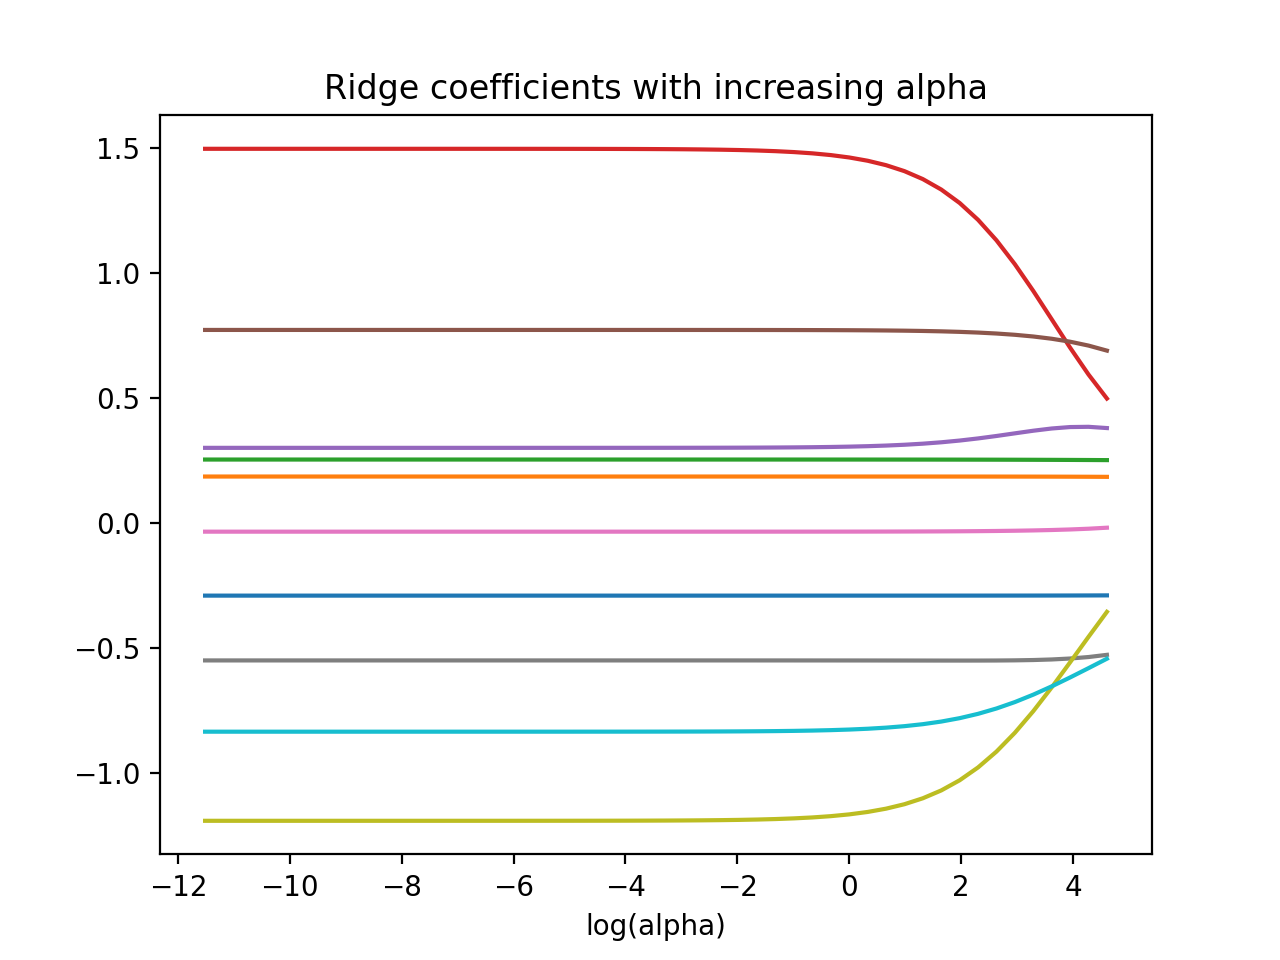

In [42]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook

n_alphas = 50
alphas = np.logspace(-5, 2, n_alphas)

coefs_ridge = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train_scaled, y_train)
    coefs_ridge.append(ridge.coef_)

first10vars_ridge = np.array(coefs_ridge)[:, :10]
plt.figure()
plt.plot(np.log(alphas), first10vars_ridge);
plt.xlabel('log(alpha)')
plt.title('Ridge coefficients with increasing alpha');

<IPython.core.display.Javascript object>


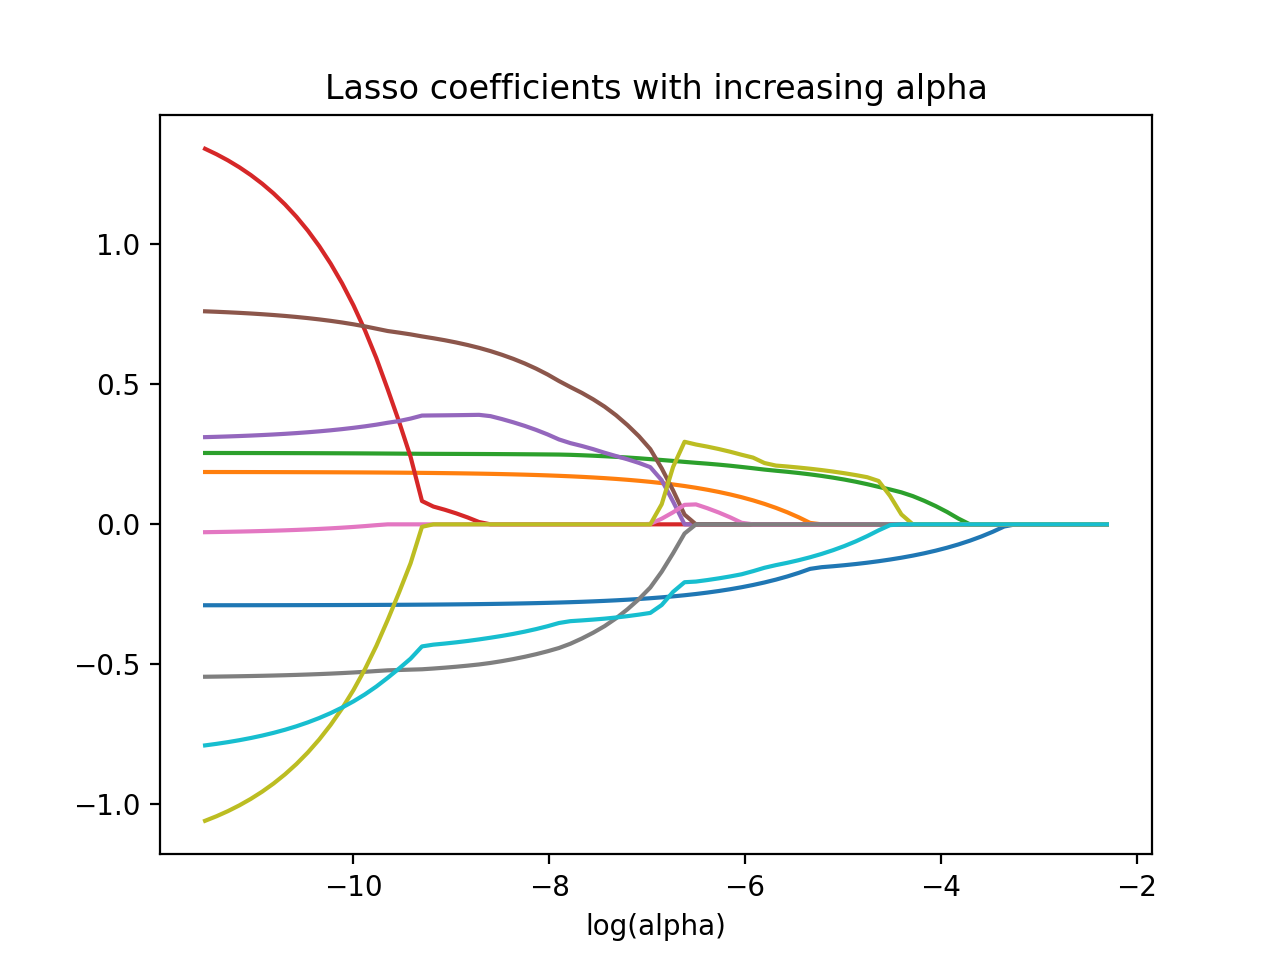

In [43]:
n_alphas = 80
alphas = np.logspace(-5, -1, n_alphas)

coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)
    
first10vars = np.array(coefs)[:, :10]
plt.figure()
plt.plot(np.log(alphas), first10vars)
plt.xlabel('log(alpha)')
plt.title('Lasso coefficients with increasing alpha');